In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [11]:
energy_data_direc = "K:/new/energy_dataset/girls_hostel_mains.csv"
df_e = pd.read_csv(energy_data_direc,index_col = 'timestamp')
df_e.index = pd.to_datetime(df_e.index,unit = 's')
df_e.index =  df_e.index + datetime.timedelta(minutes = 60*5 + 30)
df_e = df_e.drop(['current','voltage','frequency','power_factor'],axis=1)
#print(df_e)
def divide(x):
    return x/1000
y =df_e.loc['2013':'2018']['power'].apply(divide)
y=y.reset_index()

In [12]:

import dateutil.parser
def prepareData(data):
     ## add dedicated columns for day, hour and weekday 
    data['hour'] = list(map(lambda v : v.hour, data['timestamp']))
    data['day'] = list(map(lambda v : v.day, data['timestamp']))
    data['month'] = list(map(lambda v : v.month, data['timestamp']))
    data['year'] = list(map(lambda v : v.year, data['timestamp']))
    
    ## aggregate the data based on day and hour
    aggregatedData = data[['hour','day','month','year','power']].groupby(['hour', 'day','month','year']).agg(['sum'])
    
    aggregatedData = aggregatedData.reset_index()
    aggregatedData.columns = ['hour','day','month','year','power']
    
    return aggregatedData


       hour  day  month  year       power
0         0    1      1  2017  292.777423
1         0    1      2  2014  675.865521
2         0    1      2  2017  643.321190
3         0    1      3  2014  457.956849
4         0    1      3  2015  352.290164
...     ...  ...    ...   ...         ...
27689    23   31     10  2015  399.448102
27690    23   31     10  2016  458.967397
27691    23   31     10  2017  378.995772
27692    23   31     12  2016  296.534991
27693    23   31     12  2017  503.928662

[27694 rows x 5 columns]


<AxesSubplot:xlabel='day', ylabel='power'>

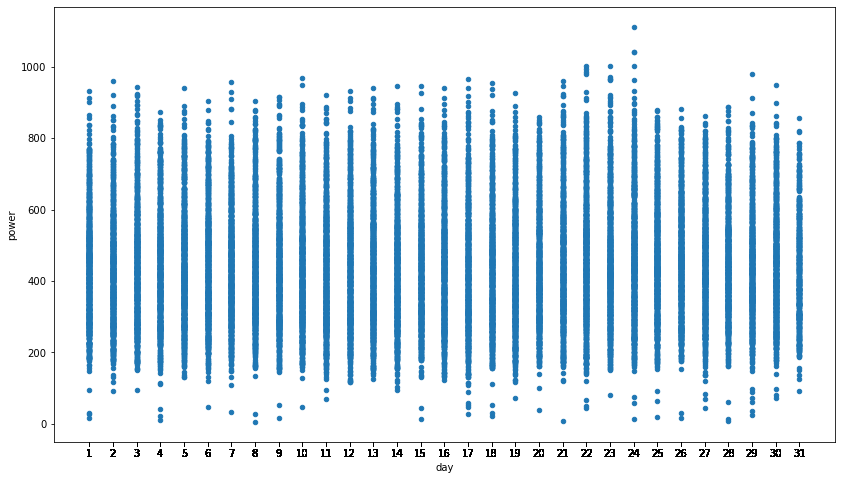

In [13]:
trainingData = prepareData(y)
trainingData.reset_index()
print(trainingData)
trainingData.plot(kind='scatter', x='day', y='power', xticks=trainingData['day'], figsize=(14,8))

In [14]:
reg = linear_model.LinearRegression()
reg.fit(trainingData[['hour','day','month','year']],trainingData.power) 

LinearRegression()

In [15]:
reg.coef_               #(m1*hour+m2*day+m3*month+m4*year+D)

array([ 3.48452822,  0.55171302, -1.97283505, 21.64196065])

In [16]:
reg.intercept_  # d

-43212.505918799325

In [17]:
reg.predict([[5,10,2,2019]])

C:\Users\kartikey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([501.60673703])

In [18]:
# 3.48452822*hour+ 0.55171302*day + (-1.97283505)*month + 21.64196065*year-43212.505918799325
ans = 3.48452822*5+ 0.55171302*10 + (-1.97283505)*2 + 21.64196065*2019-43212.505918799325
ans 

501.60673475067597